In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from joblib import load

In [2]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = load('../../analysis and preprocessing/classification_preprocessed.joblib')

In [3]:
def cnf_matrix(y_pred_test, colormap): 
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                        display_labels=[False, True])
    
    cm_display = cm_display.plot(cmap=colormap, values_format='g')


In [4]:
params = {
    'C': np.linspace(1, 10, 10),
}

In [5]:
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, 
                   param_grid=params, 
                   verbose = 8, 
                   cv = 5, 
                   n_jobs = 3)
grid.fit(X_train_scaled, y_train)

grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 2.0}

In [6]:
log_reg = LogisticRegression(C = 2.0, penalty = 'l2', solver = 'lbfgs', max_iter = 200)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=2.0, max_iter=200)

Train result: 0.8876144131618584
Test result: 0.881859962151933

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3127
           1       0.75      0.36      0.48       572

    accuracy                           0.88      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



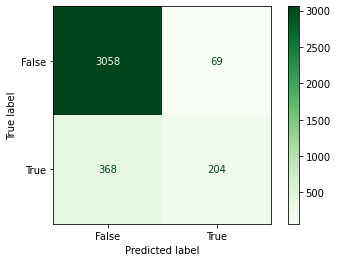

In [7]:
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)
    
train_result = accuracy_score(y_train, y_pred_train)
print("Train result:", train_result)
test_result = accuracy_score(y_test, y_pred_test)
print("Test result:", test_result)
print("\n", classification_report(y_test, y_pred_test))

cnf_matrix(y_pred_test, plt.cm.Greens)

### Sada sa balansiranjem klasa

In [8]:
oversample = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_smote, y_train = oversample.fit_resample(X_train_scaled, y_train.ravel())

In [9]:
params_smt = {
    'C': np.linspace(1, 10, 10),
}

In [10]:
log_reg_smt = LogisticRegression()
grid_smt = GridSearchCV(estimator=log_reg_smt, 
                   param_grid=params_smt, 
                   verbose = 8, 
                   cv = 5, 
                   n_jobs = 3)
grid_smt.fit(X_train_smote, y_train)

grid_smt.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 3.0}

In [11]:
log_reg_smt = LogisticRegression(C = 3.0, penalty = 'l2', solver = 'lbfgs', max_iter = 200)
log_reg_smt.fit(X_train_smote, y_train)

LogisticRegression(C=3.0, max_iter=200)

Train result: 0.8509252912954078
Test result: 0.8542849418761828

               precision    recall  f1-score   support

           0       0.95      0.88      0.91      3127
           1       0.52      0.73      0.61       572

    accuracy                           0.85      3699
   macro avg       0.73      0.80      0.76      3699
weighted avg       0.88      0.85      0.86      3699



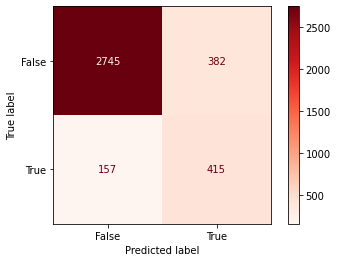

In [12]:
y_pred_train_smt = log_reg_smt.predict(X_train_smote)
y_pred_test_smt = log_reg_smt.predict(X_test_scaled)
    
train_result_smt = accuracy_score(y_train, y_pred_train_smt)
print("Train result:", train_result_smt)
test_result_smt = accuracy_score(y_test, y_pred_test_smt)
print("Test result:", test_result_smt)
print("\n", classification_report(y_test, y_pred_test_smt))

cnf_matrix(y_pred_test_smt, plt.cm.Reds)

In [13]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [14]:
fpr_lr_smt, tpr_lr_smt, threshold_lr_smt = roc_curve(y_test, y_pred_test_smt)
roc_auc_lr_smt = auc(fpr_lr_smt, tpr_lr_smt)

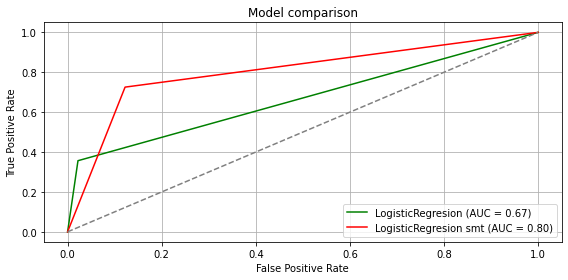

In [18]:
fig = plt.figure(figsize=(8, 4))

plt.plot(fpr_lr, tpr_lr, color='g', label = 'LogisticRegresion (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lr_smt, tpr_lr_smt, color='r', label = 'LogisticRegresion smt (AUC = %0.2f)' % roc_auc_lr_smt)

plt.grid()
plt.title("Model comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.tight_layout()
plt.show()

In [16]:
%store fpr_lr
%store tpr_lr
%store threshold_lr
%store roc_auc_lr

Stored 'fpr_lr' (ndarray)
Stored 'tpr_lr' (ndarray)
Stored 'threshold_lr' (ndarray)
Stored 'roc_auc_lr' (float64)


In [17]:
%store fpr_lr_smt
%store tpr_lr_smt
%store threshold_lr_smt
%store roc_auc_lr_smt

Stored 'fpr_lr_smt' (ndarray)
Stored 'tpr_lr_smt' (ndarray)
Stored 'threshold_lr_smt' (ndarray)
Stored 'roc_auc_lr_smt' (float64)
